In [1]:
from ellipsx import calc_psi_delta_one_layer_vec, calc_psi_delta_three_layers_vec

In [2]:
import os
os.environ['XLA_FLAGS'] = '--xla_force_host_platform_device_count=4'

In [3]:
import jax
import numpy as np
import jax.numpy as jnp

In [4]:
jax.config.update('jax_platform_name', 'cpu')
jax.config.update("jax_enable_x64", True)

In [5]:
jax.devices()

[CpuDevice(id=0), CpuDevice(id=1), CpuDevice(id=2), CpuDevice(id=3)]

In [6]:
import matplotlib.pyplot as plt

In [7]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.autolayout'] = True

In [8]:
%matplotlib inline

# Проверка моделей

In [9]:
n_sub = 3.882 - 0.019j
n_f = 1.462 - 0j
d_f = 4
d_0f = 1
d_fs = 1

In [10]:
phi_deg = jnp.linspace(0, 90, 100)

In [11]:
psi, delta = calc_psi_delta_one_layer_vec(phi_deg, n_f, d_f, n_sub)
psi_3l, delta_3l = calc_psi_delta_three_layers_vec(phi_deg, n_f, d_f, n_sub, d_0f, d_fs)

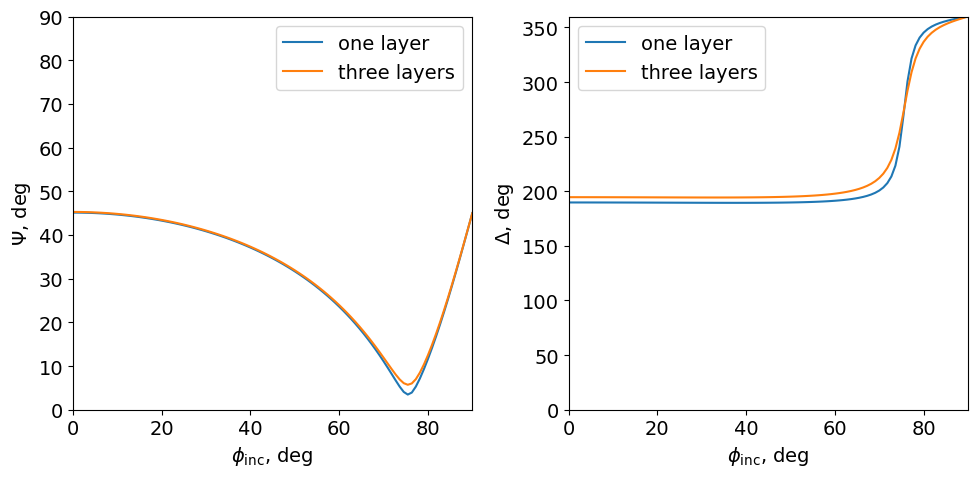

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(phi_deg, psi, label='one layer')
ax1.plot(phi_deg, psi_3l, label='three layers')
ax2.plot(phi_deg, delta, label='one layer')
ax2.plot(phi_deg, delta_3l, label='three layers')
ax1.set_xlim(0, 90)
ax1.set_ylim(0, 90)
ax1.set_xlabel(r'$\phi_\mathrm{{inc}}$, deg')
ax1.set_ylabel(r'$\Psi$, deg')
ax2.set_xlim(0, 90)
ax2.set_ylim(0, 360)
ax2.set_xlabel(r'$\phi_\mathrm{{inc}}$, deg')
ax2.set_ylabel(r'$\Delta$, deg')
ax1.legend(loc='best')
ax2.legend(loc='best');